# Sample the 311 Data

Make two new smaller files, sampled and unsampled, also build the incidents counts


Sampling is important because we have too much data to work with effectively. 

The 311 call information represents 20 million calls, and over 11 gigs of data. So I stripped out the columns that I though would be most useful, and from those I'll sample down to 10,000 rows.

In [13]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(16,16)

In [2]:
df_311_sampled = pd.read_csv("311_sampled.csv",            
                        usecols=["Unique Key","Created Date","Agency", "Agency Name","Complaint Type","Descriptor","Incident Zip"],  
                        index_col=0,
                        dtype={"Incident Zip": 'str'})

In [3]:
df_311_sampled['Date Only'] = df_311_sampled['Created Date'].apply(lambda x: x[0:10])
df_311_sampled.drop(columns=['Created Date'], inplace=True)
#df_311_sampled

In [29]:
df_incidents = (df_311_sampled.groupby(['Date Only']).count())
df_incidents.drop(axis=1, columns=['Agency','Agency Name','Complaint Type', 'Descriptor'], inplace=True)
df_incidents.rename(columns={'Incident Zip': 'count'}, inplace=True)
df_incidents.to_csv('incidents.csv')
df_incidents = pd.read_csv("incidents.csv", parse_dates=[0]) 
print(df_incidents.shape)
days = np.arange(1, df_incidents.shape[0]+1, 1)
print(days.shape)
df_incidents['day'] = days

s = df_incidents[['day','count']] 


(1599, 2)
(1599,)


In [5]:
df_incidents.head()

,Date Only,count,day
0,2015-01-01,1,1
1,2015-01-02,7,2
2,2015-01-03,5,3
3,2015-01-04,6,4
4,2015-01-05,7,5


In [6]:
df_incidents.shape

(1599, 3)

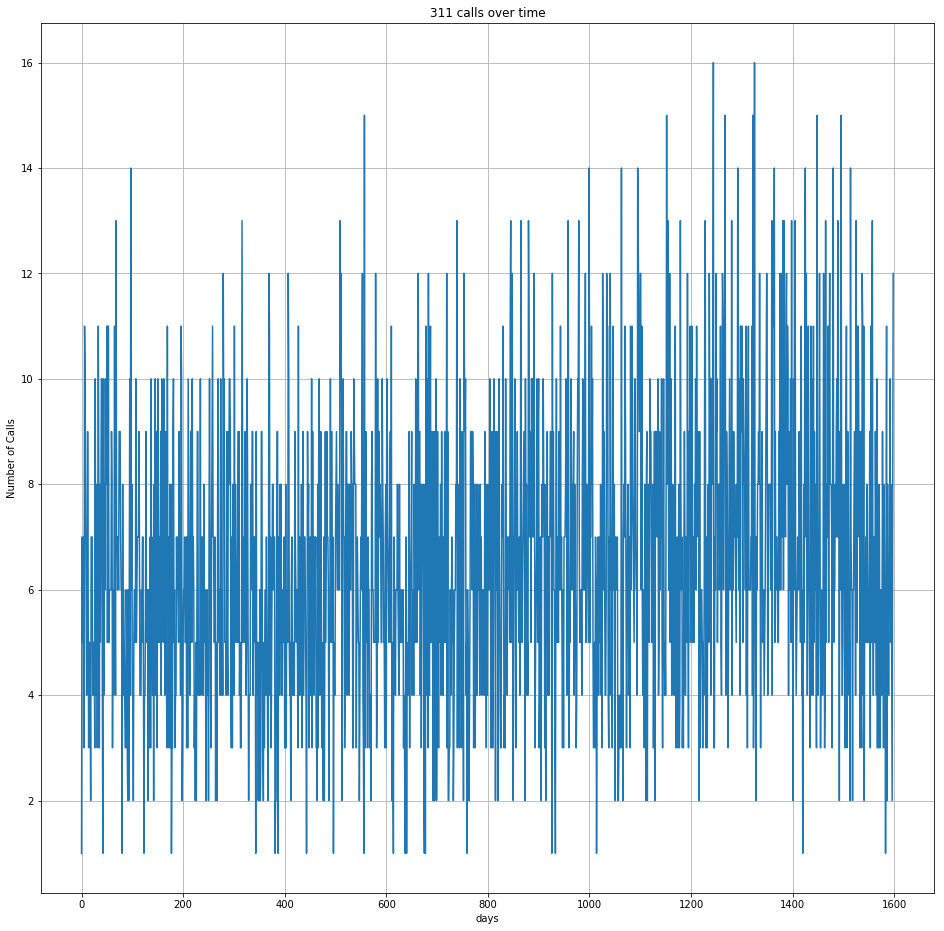

In [17]:
# Data for plotting
s = df_incidents['count'][:df_incidents.shape[0]]

t = np.arange(0, df_incidents.shape[0], 1)

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='days', ylabel='Number of Calls',
       title='311 calls over time')
ax.grid()

fig.savefig("311_calls.png")
plt.show()

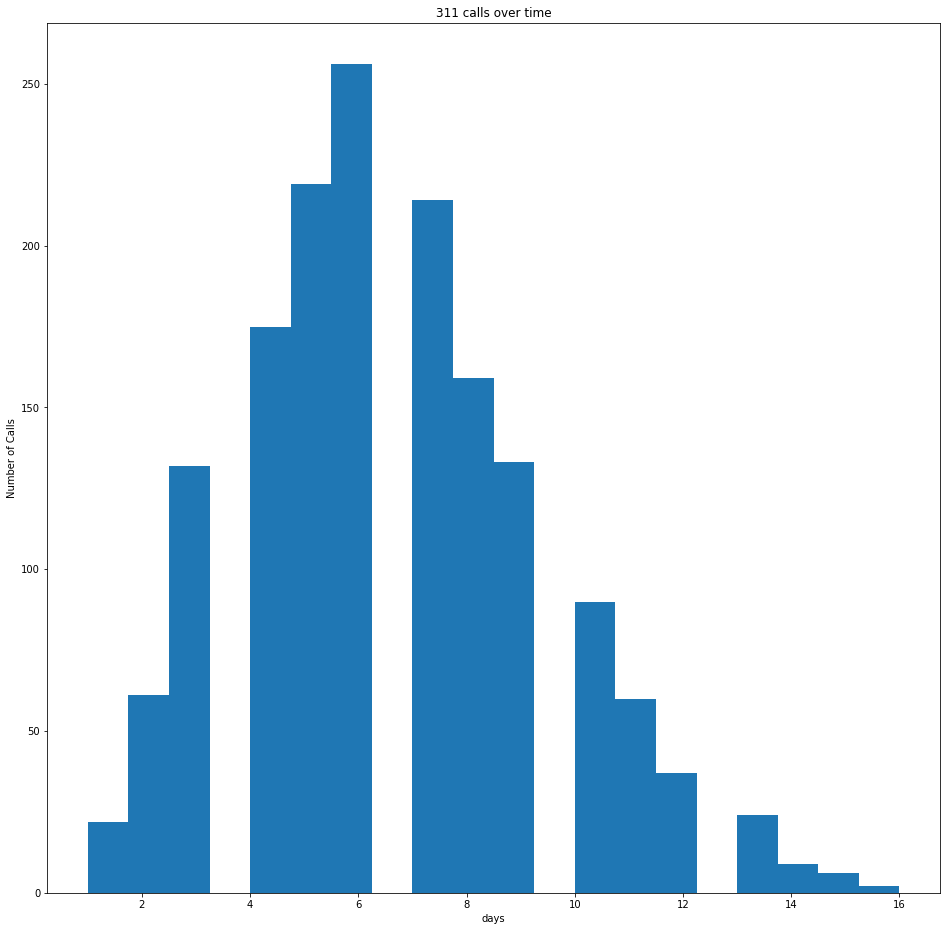

In [15]:

fig, ax = plt.subplots()
ax = s.plot.hist(bins=20)
ax.set(xlabel='days', ylabel='Number of Calls',
       title='311 calls over time')
fig.savefig("311_calls-hist.png")

In [28]:
X = pd.DataFrame([s],t)
X.head()

,0,1,2,3,4,5,6,7,8,9,...,1589,1590,1591,1592,1593,1594,1595,1596,1597,1598
0,1,7,5,6,7,3,11,10,8,6,...,4,6,6,10,5,8,5,2,7,12
1,1,7,5,6,7,3,11,10,8,6,...,4,6,6,10,5,8,5,2,7,12
2,1,7,5,6,7,3,11,10,8,6,...,4,6,6,10,5,8,5,2,7,12
3,1,7,5,6,7,3,11,10,8,6,...,4,6,6,10,5,8,5,2,7,12
4,1,7,5,6,7,3,11,10,8,6,...,4,6,6,10,5,8,5,2,7,12


In [10]:
import numpy as np
#from sklearn.linear_model import LinearRegressionfrom sklearn.metrics 
#import mean_squared_error, r2_score

X = list(range(1,df_incidents.shape[0]))
#np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
# y = 1 * x_0 + 2 * x_1 + 3
#y = 
#np.dot(X, np.array([1, 2])) + 3
reg = LinearRegression().fit(X, y)
reg.score(X, y)

print(reg.coef_)
#array([1., 2.])
print(reg.intercept_ )

reg.predict(np.array([[3, 5]]))
#array([16.])

NameError: name 'LinearRegression' is not defined

In [ ]:
df_311_sampled.Agency.unique()

In [ ]:
df_311_sampled['Agency Name'].unique()

In [ ]:
df_311_sampled['Complaint Type'].unique()